<center>
<img src="logo.png" height="900"> 
</center>


# Нормальное распределение и его друзья

В этом блокноте мы посмотрим на то, как выглядят основные распределения, встречаемые в статистике.

---------------

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# 1. Нормальное распределение 

Уже знакомы. Часто встречается на практике из-за ЦПТ. Давайте просто нарисуем плотности нормального распределения при разных $\mu$ и $\sigma$. 

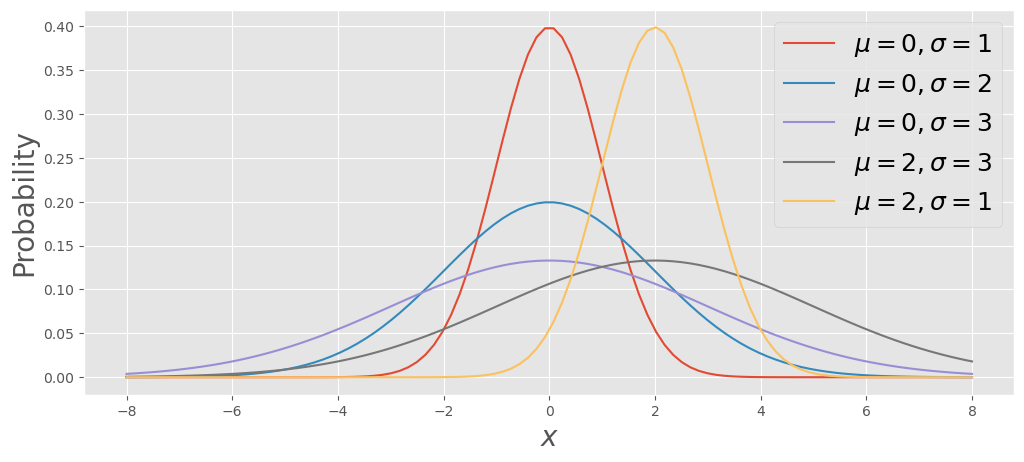

In [2]:
plt.figure(figsize=(12, 5))

x = np.linspace(-8,8,100)

par = [(0,1),(0,2),(0,3),(2,3),(2,1)]

for mu,sigma in par:
    rv = sts.norm(mu,sigma)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$\mu={},\sigma={}$".format(mu,sigma))


plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 18);

In [4]:
sts.norm(0, 1).cdf(1.65)


np.float64(0.9505285319663519)

__Когда встречается на практике?__   

Мы постоянно будем считать средние. Любое среднее благодаря ЦПТ имеет асимптотически нормальное распределение. Позже мы найдём его математическое ожидание и дисперсию и обобщим ЦПТ на более сложные случаи. 

# 2. Распределение Хи-квадрат

Пусть случайные величины $X_1, \ldots, X_k$ независимы и одинаково распределены. Причём нормально с параметрами $0$ и $1$. Обычно такой факт записывают следующим образом: 

$$
X_1, \ldots, X_k \sim iid \hspace{2mm} N(0,1).
$$ 

Буквы $iid$ расшифровываются как identically independently distributed (независимы и одинаково распределены).

__Определение:__  случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Кратко это записывают как $Y \sim \chi^2_k.$

Степень свободы это просто название для параметра распределения. Почему оно именно такое, мы обсудим позже. Сейчас давайте попробуем получить хи-квадрат из нормальной выборки. 

In [3]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина (5 степеней свободы)
x = norm_rv.rvs(5)
x = np.sum(x**2)
x

4.994998509719499

In [4]:
# хотим выборку из 1000 штук
x = norm_rv.rvs(size = (5, 1000)) 
x.shape

(5, 1000)

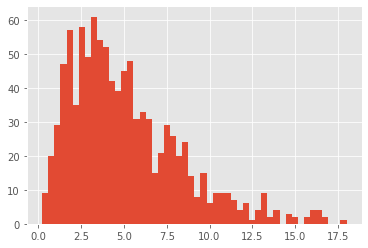

In [5]:
y = (x**2).sum(axis=0)
plt.hist(y, bins=50);

Внутри `scipy` уже есть готовая реализация $\chi^2_k$. Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. Из-за квадрата, случайная величина принимает только положительные значения. 

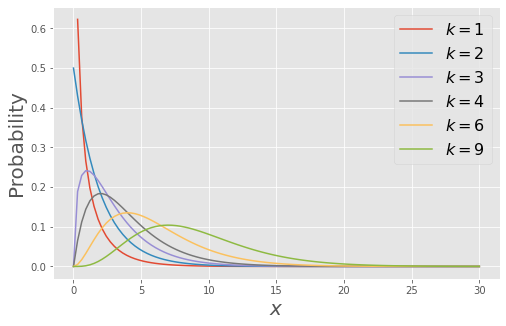

In [6]:
plt.figure(figsize=(8, 5))

x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
#plt.title("PDF ($\chi^2_k$)");

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

__Когда встречается на практике?__ Когда мы на первой неделе говорили про описательные статистики, мы упоминали, что выборочную дисперсию можно считать по формуле 

$$
\hat \sigma^2 = \bar{x^2} - \bar x^2.
$$

Ели выборка пришла к нам из нормального распределения, тогда $\bar{x^2}$ будет иметь $\chi^2_n$. Если немного поколдовать, можно убедиться, что для дисперсии тоже всплывает хи-квадрат распределение. В будущем мы это проделаем. 

# 3. Распределение Стьюдента

__Определение:__ Заведём ещё одну случайную величину $X_0$ со стандартным нормальным распределением. Пусть она низависима от $X_1, \ldots, X_k$. Тогда говорят, что случайная величина 

$$ Y = \frac{X_0}{\sqrt{\frac{\chi^2_k}{k}}} $$

имеет $t$-распределение стьюдента c $k-1$ степенью свободы, $Y \sim t (k-1)$. Снова попробуем получить это распределение из нормальной выборки. 

In [3]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина (4 степени свободы)
x0 = norm_rv.rvs(1)

x = norm_rv.rvs(5)
x = np.sum(x**2)
y = x0/np.sqrt(x/5)
y

NameError: name 'sts' is not defined

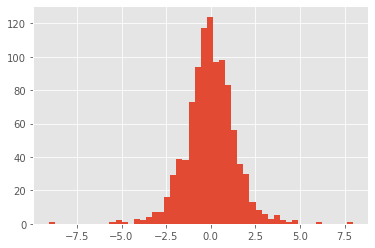

In [8]:
# хотим выборку из 1000 штук
x0 = norm_rv.rvs(1000)

x = norm_rv.rvs(size = (5, 1000)) 
x = (x**2).sum(axis=0)

y = x0/np.sqrt(x/5)

plt.hist(y, bins=50);

Снова внутри `scipy` уже есть готовая реализация $t(k)$. Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. 

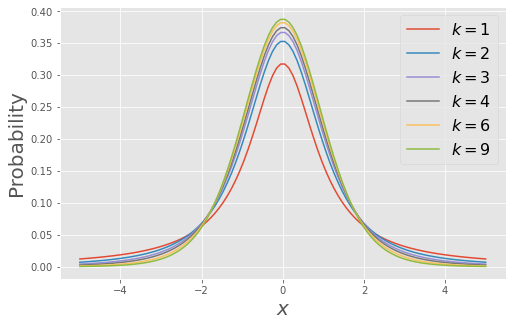

In [9]:
plt.figure(figsize=(8, 5))

x = np.linspace(-5,5,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.t(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

In [ ]:
sts.t(9).ppf(0.95)

np.float64(1.8331129326536335)

: 

Важно заметить, что при росте $k$ распределение Стьюдента становится всё больше и больше похоже на нормальное. В будущем этот факт нам пригодится. 


__Когда встречается на практике?__  Довольно часто на практике мы будем получать выражение:

$$
\frac{\bar x}{\sqrt{ \frac{\hat \sigma^2}{n}}}.
$$

Мы знаем, что по ЦПТ у числителя нормальное распределение, а в знаменателе как раз стоит  $\sqrt{\frac{\chi^2_n}{n}}$. Значит в целом выражение будет иметь распределение Стьюдента с $n-1$ степенью свободы.

# 4. Распределение Фишера

__Определение:__ случайная величина 

$$ Y = \frac{\frac{\chi^2_k}{k}}{\frac{\chi^2_m}{m}}$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$. Сгенерируем её! 

In [10]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина
k,m = 5,10
x1 = norm_rv.rvs(k)
x2 = norm_rv.rvs(m)

x1 = np.sum(x1**2)
x2 = np.sum(x2**2)

y = (x1/k)/(x2/m)
y

5.112237002351361

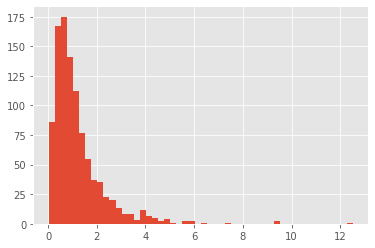

In [11]:
# хотим выборку из 1000 штук
k,m = 5,10
x1 = norm_rv.rvs(size = (k, 1000))
x2 = norm_rv.rvs(size = (m, 1000))

x1 = (x1**2).sum(axis=0)
x2 = (x2**2).sum(axis=0)

y = (x1/k)/(x2/m)

plt.hist(y, bins=50);

Снова внутри `scipy` уже есть готовая реализация $F(k,m)$.

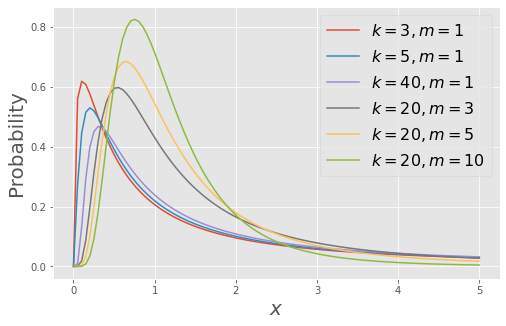

In [12]:
plt.figure(figsize=(8, 5))
x = np.linspace(0,5,100)

par = [(3,1),(5,1),(40,1),(20,3),(20,5),(20,10)]

for k,m in par:
    rv = sts.f(k,m)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k={},m={}$".format(k,m))
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

__Когда встречается на практике?__  Рано или поздно мы захотим сравнивать дисперсии. Там-то мы и встретимся с распределением Фишера. 

# 5. Тяжёлые хвосты 

Давайте нарисуем на одной картинке $N(0,1)$ и $t(1)$ распределения. 

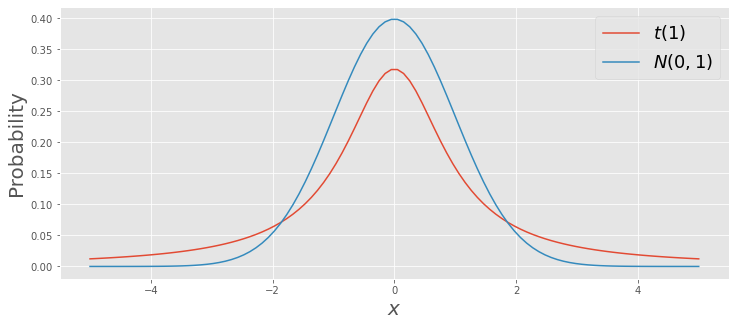

In [ ]:
plt.figure(figsize=(12, 5))
x = np.linspace(-5,5,100)

plt.plot(x, sts.t(1).pdf(x), label="$t(1)$")
plt.plot(x, sts.norm(0, 1).pdf(x), label="$N(0,1)$")

plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 18);

Посмотрите на эти две плотности. У красной хвосты лежат выше, чем у синей. Хвосты $t(1)$ тяжелее $N(0,1)$. Под ними находится большая вероятностная масса. Вероятность того, что очень большое, аномальное значение случайной величины, реализуется из распределения с тяжёлым хвостом, выше. 

In [14]:
# P(t(1) > 10)
np.mean(sts.t(1).rvs(1000) > 3)

0.111

In [15]:
# P(N(0,1) > 10)
np.mean(sts.norm(0,1).rvs(1000) > 3)

0.0

Главная проблема заключается в том, что по сравнению с количеством наблюдений из центральной части распределения, число наблюдений из хвостов, ничтожно мало. Из-за этого их постоянно недооценивают. __В статистике есть даже отдельные методы по работе с хвостами.__ 